## CSE 158 HW 2
### Christina Leung, A15468909

In [1]:
import numpy          # linear algebra
import scipy.optimize # optimization routines
import random         # random number generation
import os
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
def parseData(fname): # Parse beer data
  for l in open(fname):
    yield eval(l)
data = list(parseData("beer_50000.json"))

In [3]:
numpy.random.shuffle(data) # Shuffle and split into sets
l = len(data) // 2
training = data[0:l]
testing = data[l:]

In [4]:
# QUESTION ONE
categoryCounts = defaultdict(int) # Count beer styles
for d in data:
    categoryCounts[d['beer/style']] += 1
categories = [c for c in categoryCounts if categoryCounts[c] > 1000]
catID = dict(zip(list(categories),range(len(categories))))

def feature(datum): # One hot encoding
  feat = [0] * 13
  if datum['beer/style'] in categories:
        feat[catID[datum['beer/style']]] = 1
  return [1] + feat

X_train = [feature(d) for d in training] # Create training and testing sets
y_train = [d['beer/ABV'] > 7.0 for d in training]
xtest = [feature(d) for d in testing]
ytest = [d['beer/ABV'] > 7.0 for d in testing]

mod = linear_model.LogisticRegression(C=10.0, class_weight='balanced') # Fit classifier
mod.fit(X_train, y_train)
pred = mod.predict(xtest)

TP_ = numpy.logical_and(pred, ytest) # Calculate accuracy
FP_ = numpy.logical_and(pred, numpy.logical_not(ytest))
TN_ = numpy.logical_and(numpy.logical_not(pred), numpy.logical_not(ytest))
FN_ = numpy.logical_and(numpy.logical_not(pred), ytest)
TP = sum(TP_)
FP = sum(FP_)
TN = sum(TN_)
FN = sum(FN_)

print((TP + TN) / len(testing))
print(((FP/(TP + FN)) + (FN/(TN + FP)))/2)

0.84856
0.14345467731122624


## Question 1
accuracy = 0.84716<br>
BER = 0.14438417314433188

In [5]:
# QUESTION TWO
lens = [] # Find longest review length
for d in data:
    lens.append(len(d['review/text']))
maxl = max(lens)

def feature2(datum): # One hot encoding
  feat = [0] * 13
  if datum['beer/style'] in categories:
        feat[catID[datum['beer/style']]] = 1
  feat2 = [len(datum['review/text']) / maxl]
  feat3 = [datum['review/appearance'], datum['review/palate'], datum['review/taste'], datum['review/overall'], datum['review/aroma']]
  return [1] + feat + feat2 + feat3

X_train = [feature2(d) for d in training] # Create training and testing sets
y_train = [d['beer/ABV'] > 7.0 for d in training]
xtest = [feature2(d) for d in testing]
ytest = [d['beer/ABV'] > 7.0 for d in testing]

mod = linear_model.LogisticRegression(C=10.0, class_weight='balanced', max_iter = 999999) # Fit classifier
mod.fit(X_train, y_train)
pred = mod.predict(xtest)

TP_ = numpy.logical_and(pred, ytest) # Calculate accuracy
FP_ = numpy.logical_and(pred, numpy.logical_not(ytest))
TN_ = numpy.logical_and(numpy.logical_not(pred), numpy.logical_not(ytest))
FN_ = numpy.logical_and(numpy.logical_not(pred), ytest)
TP = sum(TP_)
FP = sum(FP_)
TN = sum(TN_)
FN = sum(FN_)

print((TP + TN) / len(testing))
print(((FP/(TP + FN)) + (FN/(TN + FP)))/2)

0.8624
0.13439861805984435


## Question 2
accuracy = 0.86276<br>
BER = 0.13330288706168414

[0.3301336941651941, 0.32785433735767616, 0.3043572078939324, 0.19341581393025298]
[0.3337960834179654, 0.3317840524381191, 0.3080843281974192, 0.19232086017644762]
[0.33148707827115786, 0.329421564674558, 0.3025020717604982, 0.19342996133296436]


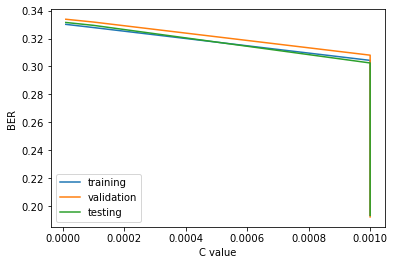

In [6]:
# QUESTION THREE
l2 = len(testing) // 2 # Make validation data
test_2 = testing[0:l2]
valid_2 = testing[l2:]

xval = [feature2(d) for d in valid_2] # Create validation and testing sets
yval = [d['beer/ABV'] > 7.0 for d in valid_2]
xtest = [feature2(d) for d in test_2]
ytest = [d['beer/ABV'] > 7.0 for d in test_2]

def makerates(pred, ytest):
    TP_ = numpy.logical_and(pred, ytest) # Calculate accuracy
    FP_ = numpy.logical_and(pred, numpy.logical_not(ytest))
    TN_ = numpy.logical_and(numpy.logical_not(pred), numpy.logical_not(ytest))
    FN_ = numpy.logical_and(numpy.logical_not(pred), ytest)
    TP = sum(TP_)
    FP = sum(FP_)
    TN = sum(TN_)
    FN = sum(FN_)
    return ((FP/(TP + FN)) + (FN/(TN + FP)))/2
trainr = []
validr = []
testr = []
mod = linear_model.LogisticRegression(C=10.0**(-6), class_weight='balanced', max_iter = 999999) # Fit classifier
mod.fit(X_train, y_train)
pred = mod.predict(X_train)
trainr.append(makerates(pred, y_train))
pred = mod.predict(xval)
validr.append(makerates(pred, yval))
pred = mod.predict(xtest)
testr.append(makerates(pred, ytest))

mod = linear_model.LogisticRegression(C=10.0**(-5), class_weight='balanced', max_iter = 999999) # Fit classifier
mod.fit(X_train, y_train)
pred = mod.predict(X_train)
trainr.append(makerates(pred, y_train))
pred = mod.predict(xval)
validr.append(makerates(pred, yval))
pred = mod.predict(xtest)
testr.append(makerates(pred, ytest))

mod = linear_model.LogisticRegression(C=10.0**(-4), class_weight='balanced', max_iter = 999999) # Fit classifier
mod.fit(X_train, y_train)
pred = mod.predict(X_train)
trainr.append(makerates(pred, y_train))
pred = mod.predict(xval)
validr.append(makerates(pred, yval))
pred = mod.predict(xtest)
testr.append(makerates(pred, ytest))

mod = linear_model.LogisticRegression(C=10.0**(-3), class_weight='balanced', max_iter = 999999) # Fit classifier
mod.fit(X_train, y_train)
pred = mod.predict(X_train)
trainr.append(makerates(pred, y_train))
pred = mod.predict(xval)
validr.append(makerates(pred, yval))
pred = mod.predict(xtest)
testr.append(makerates(pred, ytest))

print(trainr)
print(validr)
print(testr)

x = [10.0E-6, 10.0E-5, 10.0E-4, 10.0E-4]
plt.plot(x, trainr, label = "training")
plt.plot(x, validr, label = "validation")
plt.plot(x, testr, label = "testing")
plt.xlabel("C value")
plt.ylabel("BER")
plt.legend() # Display legend
plt.show()

## Question 3
10^-6: training BER = 0.3301336941651941, validation BER = 0.3337960834179654, testing BER = 0.33148707827115786<br>
10^-5: training BER = 0.32785433735767616, validation BER = 0.3317840524381191, testing BER = 0.329421564674558<br>
10^-4: training BER = 0.3043572078939324, validation BER = 0.3080843281974192, testing BER = 0.3025020717604982<br>
10^-3: training BER = 0.19341581393025298, validation BER = 0.19232086017644762, testing BER = 0.19342996133296436<br>
I would select the classifer trained with C = 10^-3 because it has the lowest BER for training, validation, and testing data.

In [7]:
# QUESTION 4
def feature3(datum): # without length
  feat = [0] * 13
  if datum['beer/style'] in categories:
    feat[catID[datum['beer/style']]] = 1
  feat3 = [datum['review/appearance'], datum['review/palate'], datum['review/taste'], datum['review/overall'], datum['review/aroma']]
  return [1] + feat + feat3
def feature4(datum): # without ratings
  feat = [0] * 13
  if datum['beer/style'] in categories:
    feat[catID[datum['beer/style']]] = 1
  feat2 = [len(datum['review/text']) / maxl]
  return [1] + feat + feat2
def feature5(datum): # without style
  feat2 = [len(datum['review/text']) / maxl]
  feat3 = [datum['review/appearance'], datum['review/palate'], datum['review/taste'], datum['review/overall'], datum['review/aroma']]
  return [1] + feat2 + feat3

In [8]:
X_train1 = [feature3(d) for d in training] # without length
xtest1 = [feature3(d) for d in test_2]
ytest1 = [d['beer/ABV'] > 7.0 for d in test_2]
xval1 = [feature3(d) for d in valid_2] # Create validation and testing sets
yval1 = [d['beer/ABV'] > 7.0 for d in valid_2]

def makerates(pred, ytest):
    TP_ = numpy.logical_and(pred, ytest) # Calculate accuracy
    FP_ = numpy.logical_and(pred, numpy.logical_not(ytest))
    TN_ = numpy.logical_and(numpy.logical_not(pred), numpy.logical_not(ytest))
    FN_ = numpy.logical_and(numpy.logical_not(pred), ytest)
    TP = sum(TP_)
    FP = sum(FP_)
    TN = sum(TN_)
    FN = sum(FN_)
    return ((FP/(TP + FN)) + (FN/(TN + FP)))/2
trainr = []
validr = []
testr = []
mod = linear_model.LogisticRegression(C=10.0**(-6), class_weight='balanced', max_iter = 999999) # Fit classifier
mod.fit(X_train1, y_train)
pred = mod.predict(X_train1)
trainr.append(makerates(pred, y_train))
pred = mod.predict(xval1)
validr.append(makerates(pred, yval1))
pred = mod.predict(xtest1)
testr.append(makerates(pred, ytest1))

mod = linear_model.LogisticRegression(C=10.0**(-5), class_weight='balanced', max_iter = 999999) # Fit classifier
mod.fit(X_train1, y_train)
pred = mod.predict(X_train1)
trainr.append(makerates(pred, y_train))
pred = mod.predict(xval1)
validr.append(makerates(pred, yval1))
pred = mod.predict(xtest1)
testr.append(makerates(pred, ytest1))

mod = linear_model.LogisticRegression(C=10.0**(-4), class_weight='balanced', max_iter = 999999) # Fit classifier
mod.fit(X_train1, y_train)
pred = mod.predict(X_train1)
trainr.append(makerates(pred, y_train))
pred = mod.predict(xval1)
validr.append(makerates(pred, yval1))
pred = mod.predict(xtest1)
testr.append(makerates(pred, ytest1))

mod = linear_model.LogisticRegression(C=10.0**(-3), class_weight='balanced', max_iter = 999999) # Fit classifier
mod.fit(X_train1, y_train)
pred = mod.predict(X_train1)
trainr.append(makerates(pred, y_train))
pred = mod.predict(xval1)
validr.append(makerates(pred, yval1))
pred = mod.predict(xtest1)
testr.append(makerates(pred, ytest1))

print(trainr)
print(validr)
print(testr)

[0.33020237416209874, 0.3279033637054759, 0.3045042869373316, 0.19387489022959226]
[0.3339282047561678, 0.33176509355272277, 0.3083204279755155, 0.19302915951073643]
[0.3316373638136887, 0.3294319504698338, 0.30292971459320434, 0.19423331802199753]


In [15]:
X_train1 = [feature4(d) for d in training] # without ratings
xtest1 = [feature4(d) for d in test_2]
ytest1 = [d['beer/ABV'] > 7.0 for d in test_2]
xval1 = [feature4(d) for d in valid_2] # Create validation and testing sets
yval1 = [d['beer/ABV'] > 7.0 for d in valid_2]

def makerates(pred, ytest):
    TP_ = numpy.logical_and(pred, ytest) # Calculate accuracy
    FP_ = numpy.logical_and(pred, numpy.logical_not(ytest))
    TN_ = numpy.logical_and(numpy.logical_not(pred), numpy.logical_not(ytest))
    FN_ = numpy.logical_and(numpy.logical_not(pred), ytest)
    TP = sum(TP_)
    FP = sum(FP_)
    TN = sum(TN_)
    FN = sum(FN_)
    return ((FP/(TP + FN)) + (FN/(TN + FP)))/2
trainr = []
validr = []
testr = []
mod = linear_model.LogisticRegression(C=10.0**(-6), class_weight='balanced', max_iter = 999999) # Fit classifier
mod.fit(X_train1, y_train)
pred = mod.predict(X_train1)
trainr.append(makerates(pred, y_train))
pred = mod.predict(xval1)
validr.append(makerates(pred, yval1))
pred = mod.predict(xtest1)
testr.append(makerates(pred, ytest1))

mod = linear_model.LogisticRegression(C=10.0**(-5), class_weight='balanced', max_iter = 999999) # Fit classifier
mod.fit(X_train1, y_train)
pred = mod.predict(X_train1)
trainr.append(makerates(pred, y_train))
pred = mod.predict(xval1)
validr.append(makerates(pred, yval1))
pred = mod.predict(xtest1)
testr.append(makerates(pred, ytest1))

mod = linear_model.LogisticRegression(C=10.0**(-4), class_weight='balanced', max_iter = 999999) # Fit classifier
mod.fit(X_train1, y_train)
pred = mod.predict(X_train1)
trainr.append(makerates(pred, y_train))
pred = mod.predict(xval1)
validr.append(makerates(pred, yval1))
pred = mod.predict(xtest1)
testr.append(makerates(pred, ytest1))

mod = linear_model.LogisticRegression(C=10.0**(-3), class_weight='balanced', max_iter = 999999) # Fit classifier
mod.fit(X_train1, y_train)
pred = mod.predict(X_train1)
trainr.append(makerates(pred, y_train))
pred = mod.predict(xval1)
validr.append(makerates(pred, yval1))
pred = mod.predict(xtest1)
testr.append(makerates(pred, ytest1))

print(trainr)
print(validr)
print(testr)

[0.2990752277666188, 0.14608789015364793, 0.14236016332147017, 0.14236016332147017]
[0.2852062841049604, 0.14954452819208094, 0.14644738360830695, 0.14644738360830695]
[0.2955701446844112, 0.14512819824652815, 0.14046934642807307, 0.14046934642807307]


In [10]:
X_train1 = [feature5(d) for d in training] # without style
xtest1 = [feature5(d) for d in test_2]
ytest1 = [d['beer/ABV'] > 7.0 for d in test_2]
xval1 = [feature5(d) for d in valid_2] # Create validation and testing sets
yval1 = [d['beer/ABV'] > 7.0 for d in valid_2]

def makerates(pred, ytest):
    TP_ = numpy.logical_and(pred, ytest) # Calculate accuracy
    FP_ = numpy.logical_and(pred, numpy.logical_not(ytest))
    TN_ = numpy.logical_and(numpy.logical_not(pred), numpy.logical_not(ytest))
    FN_ = numpy.logical_and(numpy.logical_not(pred), ytest)
    TP = sum(TP_)
    FP = sum(FP_)
    TN = sum(TN_)
    FN = sum(FN_)
    return ((FP/(TP + FN)) + (FN/(TN + FP)))/2
trainr = []
validr = []
testr = []
mod = linear_model.LogisticRegression(C=10.0**(-6), class_weight='balanced', max_iter = 999999) # Fit classifier
mod.fit(X_train1, y_train)
pred = mod.predict(X_train1)
trainr.append(makerates(pred, y_train))
pred = mod.predict(xval1)
validr.append(makerates(pred, yval1))
pred = mod.predict(xtest1)
testr.append(makerates(pred, ytest1))

mod = linear_model.LogisticRegression(C=10.0**(-5), class_weight='balanced', max_iter = 999999) # Fit classifier
mod.fit(X_train1, y_train)
pred = mod.predict(X_train1)
trainr.append(makerates(pred, y_train))
pred = mod.predict(xval1)
validr.append(makerates(pred, yval1))
pred = mod.predict(xtest1)
testr.append(makerates(pred, ytest1))

mod = linear_model.LogisticRegression(C=10.0**(-4), class_weight='balanced', max_iter = 999999) # Fit classifier
mod.fit(X_train1, y_train)
pred = mod.predict(X_train1)
trainr.append(makerates(pred, y_train))
pred = mod.predict(xval1)
validr.append(makerates(pred, yval1))
pred = mod.predict(xtest1)
testr.append(makerates(pred, ytest1))

mod = linear_model.LogisticRegression(C=10.0**(-3), class_weight='balanced', max_iter = 999999) # Fit classifier
mod.fit(X_train1, y_train)
pred = mod.predict(X_train1)
trainr.append(makerates(pred, y_train))
pred = mod.predict(xval1)
validr.append(makerates(pred, yval1))
pred = mod.predict(xtest1)
testr.append(makerates(pred, ytest1))

print(trainr)
print(validr)
print(testr)

[0.3512978592334295, 0.35147431097552356, 0.3465803174955163, 0.3290331252041169]
[0.3526390318904637, 0.35232739200056806, 0.34803908736447065, 0.3326496617110589]
[0.3522375116210365, 0.3525460262970393, 0.34789144190931637, 0.3320350575090277]


## Question 4
without review length: <br>
10^-6: training BER = 0.33020237416209874, validation BER = 0.3339282047561678, testing BER = 0.3316373638136887<br>
10^-5: training BER = 0.3279033637054759, validation BER = 0.33176509355272277, testing BER = 0.3294319504698338<br>
10^-4: training BER = 0.3045042869373316, validation BER = 0.3083204279755155, testing BER = 0.30292971459320434<br>
10^-3: training BER = 0.19387489022959226, validation BER = 0.19302915951073643, testing BER = 0.19423331802199753<br>
without vector of five ratings: <br>
10^-6: training BER = 0.2990752277666188, validation BER = 0.2852062841049604, testing BER = 0.2955701446844112<br>
10^-5: training BER = 0.14608789015364793, validation BER = 0.14954452819208094, testing BER = 0.14512819824652815<br>
10^-4: training BER = 0.14236016332147017, validation BER = 0.14644738360830695, testing BER = 0.14046934642807307<br>
10^-3: training BER = 0.14236016332147017, validation BER = 0.14644738360830695, testing BER = 0.14046934642807307<br>
without beer style: <br>
10^-6: training BER = 0.3512978592334295, validation BER = 0.3526390318904637, testing BER = 0.3522375116210365<br>
10^-5: training BER = 0.35147431097552356, validation BER = 0.35232739200056806, testing BER = 0.3525460262970393<br>
10^-4: training BER = 0.3465803174955163, validation BER = 0.34803908736447065, testing BER = 0.34789144190931637<br>
10^-3: training BER = 0.3290331252041169, validation BER = 0.3326496617110589, testing BER = 0.3320350575090277<br>

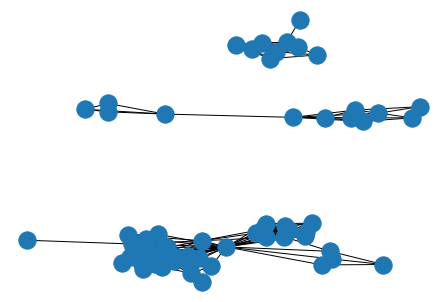

<Figure size 432x288 with 0 Axes>

In [11]:
edges = set()
nodes = set()
f = open('egonet.txt','r')
for edge in f:
  x,y = edge.split()
  x,y = int(x),int(y)
  edges.add((x,y))
  edges.add((y,x))
  nodes.add(x)
  nodes.add(y)

G = nx.Graph()
for e in edges:
  G.add_edge(e[0],e[1])
nx.draw(G)
plt.show()
plt.clf()

In [12]:
# QUESTION 6
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[40, 12, 9]

## QUESTION 6
There are three connected components in the graph. There are 40 nodes in the largest connected component.

In [13]:
# QUESTION 7
sets = []
for c in sorted(nx.connected_components(G), key=len, reverse=True):
    sets.append(c)
cc = sorted(sets[0])
l = len(cc) // 2
c1 = cc[0:l]
c2 = cc[l:]
ed1 = 0
ed2 = 0
count = 0
myedges = []
for e in edges:
    if e[0] in cc and e[1] in cc:
        myedges.append(e)
for e in myedges:
    if e[0] in c1 and e[1] in c1:
        ed1 += 2
    elif e[0] in c2 and e[1] in c2:
        ed2 += 2
    else:
        count+= 1
        ed1 += 1
        ed2 += 1
print(ed1)
print(ed2)
print(0.5 * ( (count/ed1) + (count/ed2) ))

484
396
0.42240587695133147


## Question 7
cost: 0.42240587695133147

In [14]:
# QUESTION 8
def checkcost(t1, t2):
    count = 0
    ed1 = 0
    ed2 = 0
    for e in myedges:
        if e[0] in t1 and e[1] in t1:
            ed1 += 2
        elif e[0] in t2 and e[1] in t2:
            ed2 += 2
        else:
            count+= 1
            ed1 += 1
            ed2 += 1
    return (0.5 * ( (count/ed1) + (count/ed2) ))
curr = 0.42240587695133147
vals = {}
vals2 = {}
while True:
    for node in c1:
        t1 = c1.copy()
        t2 = c2.copy()
        t2.append(node)
        t1.remove(node)
        tmp = checkcost(t1, t2)
        if (tmp < curr):
            vals[node] = tmp
    mmin = curr
    minnode = None
    for key, value in vals.items():
        if value < mmin:
            mmin = value
            minnode = key
    for node in c2:
        t1 = c1.copy()
        t2 = c2.copy()
        t1.append(node)
        t2.remove(node)
        tmp = checkcost(t1, t2)
        if (tmp < curr):
            vals2[node] = tmp
    mmin2 = curr
    minnode2 = None
    for key, value in vals2.items():
        if value < mmin2:
            mmin2 = value
            minnode2 = key
    if len(vals) == 0 and len(vals2) == 0:
        break
    if (mmin <= mmin2):
        c1.remove(minnode)
        c2.append(minnode)
    else:
        c1.append(minnode2)
        c2.remove(minnode2)
    curr = checkcost(c1, c2)
    vals = {}
    vals2 = {}
print(curr)
c1.sort()
c2.sort()
print(c1)
print(c2)

0.09817045961624274
[697, 703, 708, 713, 719, 745, 747, 753, 769, 772, 774, 798, 800, 803, 805, 810, 811, 819, 823, 828, 830, 840, 856, 869, 880, 890]
[729, 804, 825, 861, 863, 864, 876, 878, 882, 884, 886, 888, 889, 893]


## Question 8
cost: 0.09817045961624274<br>
[697, 703, 708, 713, 719, 745, 747, 753, 769, 772, 774, 798, 800, 803, 805, 810, 811, 819, 823, 828, 830, 840, 856, 869, 880, 890]<br>
[729, 804, 825, 861, 863, 864, 876, 878, 882, 884, 886, 888, 889, 893]